## Table of Contents

### 1) Import libraries
### 2) Read in Dataset
### 3) Clean Dataset
### 4) Set Visualization Style
### 5) Distribution of Budgets
### 6) Highest Profit Movies
### 7) Correlation of Movie Attributes
### 8) Count Movies Released per Weekday
### 9) Count Movies Released per Month
### 10) Average Profit per Month
### 11) Top 10 Genres Produced
### 12) Average Profit per Genre
### 13) Genre Trends
### 14) Gender Breakdown of Actors in High Profit Movies

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import ast
import datetime
% matplotlib inline

## Read in Dataset

In [66]:
df_movie = pd.read_csv('/Users/saronakenny/Documents/SCUSummerQuarter2018/Data Viz/Individual Project/movies_metadata.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean Data

In [67]:
df_movie['budget'] = pd.to_numeric(df_movie['budget'], errors='coerce')
df_movie['revenue'] = pd.to_numeric(df_movie['revenue'], errors='coerce')
df_movie['vote_count'] = pd.to_numeric(df_movie['vote_count'], errors='coerce')

In [68]:
df_movie['budget'] = df_movie['budget'].replace(0,np.nan)
df_movie['revenue'] = df_movie['revenue'].replace(0,np.nan)
df_movie['vote_count'] = df_movie['vote_count'].replace(0,np.nan)

Create DateTime

In [69]:
df_movie['release_date_datetime'] = pd.to_datetime(df_movie['release_date'],errors='coerce')

In [70]:
df_movie['release_year'] = df_movie['release_date_datetime'].dt.year
df_movie['release_weekday'] = df_movie['release_date_datetime'].dt.weekday_name
df_movie['release_day'] = df_movie['release_date_datetime'].dt.day
df_movie['release_month'] = df_movie['release_date_datetime'].dt.month_name()

In [71]:
df_movie['profit'] = df_movie['revenue']- df_movie['budget']

## Set Visualization Style

In [72]:
sns.set_context('talk')
sns.set_style('darkgrid')

## Distribution of budgets for movies

In [73]:
def x_fmt(tick_val, pos):
    if tick_val >=1000000 and tick_val <1000000000:
        val = int(tick_val)/1000000
        return '${:.0f} M'.format(val)
    elif tick_val >= 1000000000:
        val = int(tick_val) / 1000000000
        return '${:.1f} B'.format(val)
    else:
        return tick_val

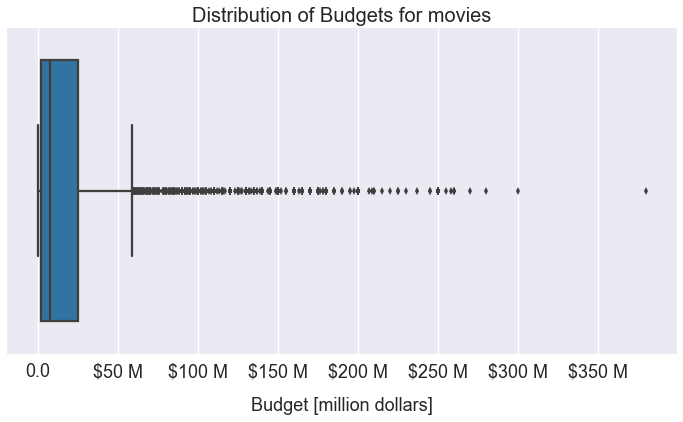

In [74]:
x = df_movie[df_movie['budget'].notnull()]['budget'].astype(int)
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x)
ax.xaxis.set_major_formatter(plt.FuncFormatter(x_fmt))
plt.title("Distribution of Budgets for movies", fontsize = 20);
plt.xlabel('Budget [million dollars]', labelpad = 16, fontsize = 18);
ax.tick_params(axis='both', labelsize=18)

The budget of most movies is about $20,000,000. However, there are many outliers

In [75]:
df_movie['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

There is a huge range of budgets. The most expensive was $380,000,000

In [76]:
df_movie[df_movie['budget']==380000000]['title']

17124    Pirates of the Caribbean: On Stranger Tides
Name: title, dtype: object

Pirates of the Caribbean: On Stranger Tides was the highest budget movie 

## Bar Graph of 10 Highest Profit Movies

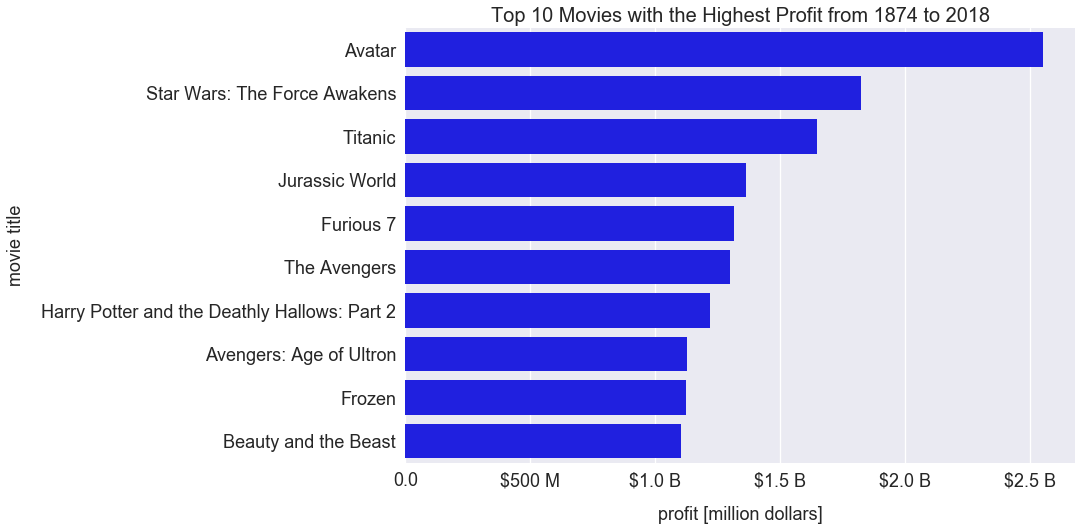

In [77]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'profit', y = 'title', data = df_movie[df_movie['profit'].notnull()].sort_values(by ='profit', ascending=False).head(10), orient = 'h', color = 'blue');
ax.xaxis.set_major_formatter(plt.FuncFormatter(x_fmt))
plt.title("Top 10 Movies with the Highest Profit from 1874 to 2018", fontsize = 20);
plt.ylabel('movie title', labelpad = 16, fontsize = 18);
plt.xlabel('profit [million dollars]', labelpad = 16, fontsize = 18);
ax.tick_params(axis='both', labelsize=18)

Highest profit movie is Avatar which generated over $2.5 B in profit. It is interesting to note that the highest budget and highest profit are not the same. Maybe a high budget is not the most important factor in creating a profitable movie 

## Correlation Matrix

In [78]:
df_corr = df_movie[['budget', 'revenue', 'vote_count', 'profit']]
df_corr.columns= ['budget',
                'revenue',
                'vote count',
                'profit',]

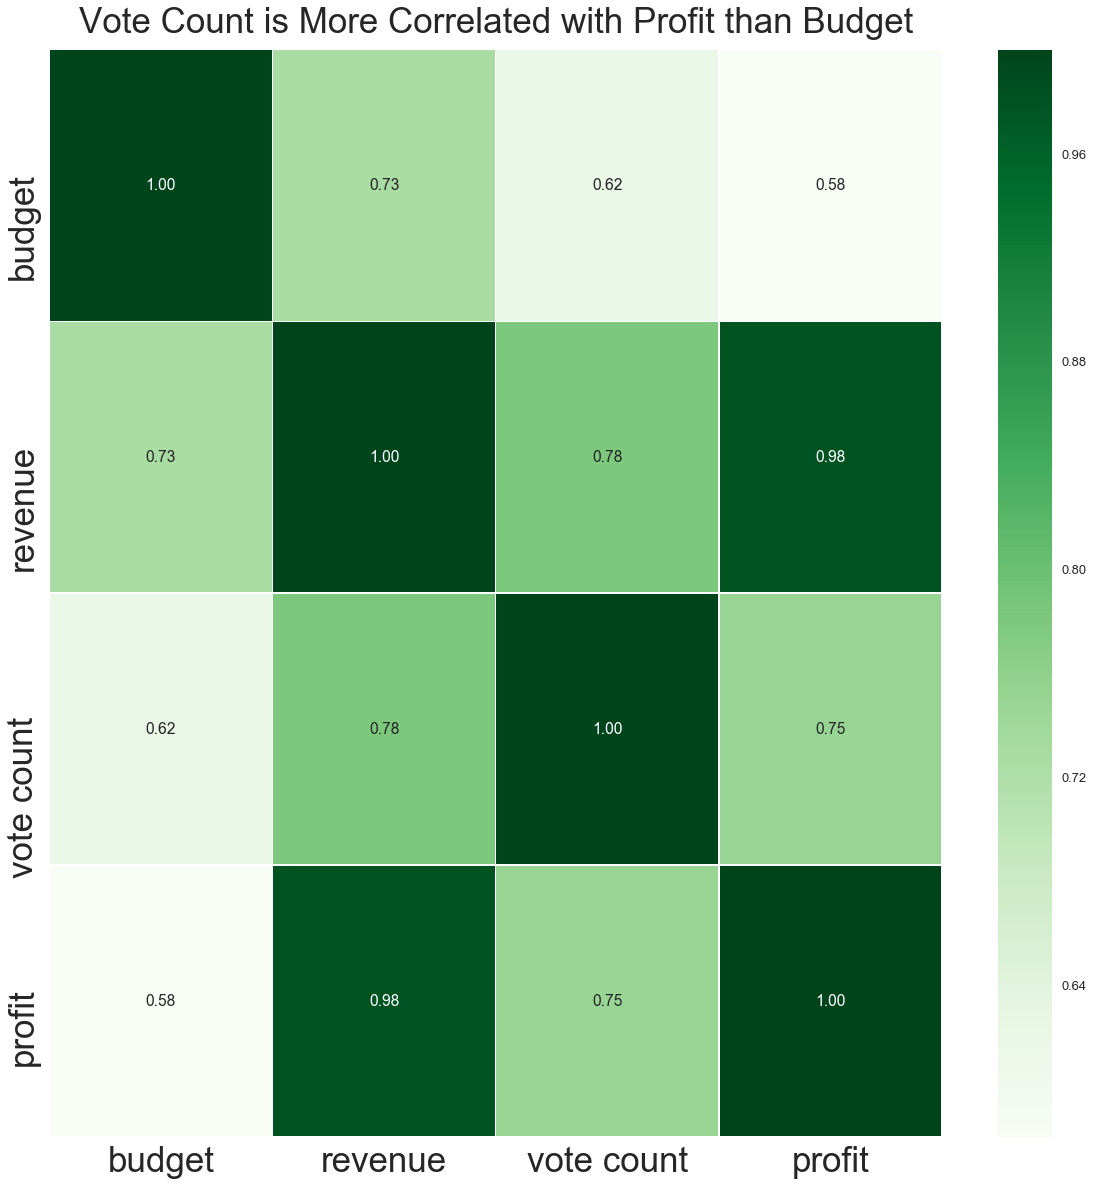

In [141]:
corr = df_corr.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
           annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap="Greens")
ax.tick_params(axis='both', labelsize=35)
ax.axes.set_title("Vote Count is More Correlated with Profit than Budget", fontsize= 35, y=1.01);

Vote count is more highly correlated with profit and revenue than the budget which means, higher budget films don't necessarily increase sales. Vote count comes from how many people liked the movie and how well the movie was perceived by the public which has a bigger impact on sales.

## Count of Movies Released per Day of Week

In [80]:
def convert_K(tick_val, pos):
        val = int(tick_val) / 1000
        return '{:.0f} K'.format(val)

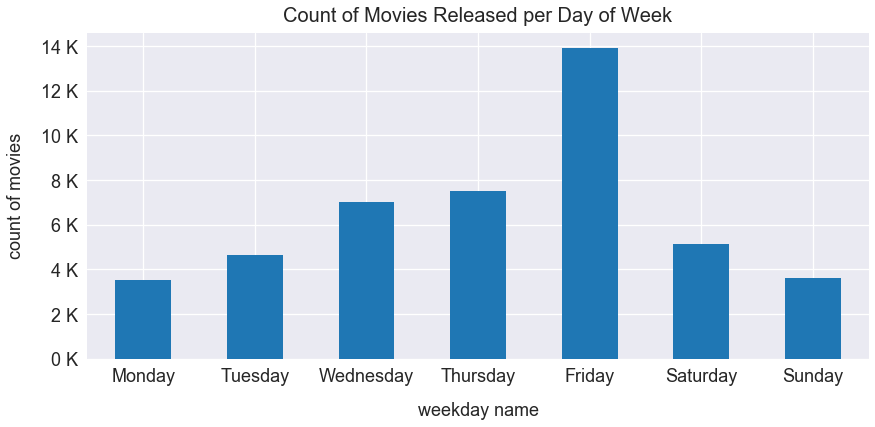

In [81]:
ax = df_movie.pivot_table(values = 'release_date', index='release_weekday', aggfunc='count').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(14, 6), rot=0)
plt.xlabel("weekday name", labelpad=16, fontsize = 18)
plt.ylabel("count of movies", labelpad=16, fontsize = 18)
plt.title("Count of Movies Released per Day of Week", y=1.015, fontsize=20);
ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_K))
ax.tick_params(axis='both', labelsize=18)
ax.legend_.remove()

Most movies were released on a Friday which makes sense because people are more likely to go watch a movie on a Friday or the weekend after the Friday it is released than to watch a movie on a random weekday.

In [82]:
monthlab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

I would expect that most movies are released in June, July, and August, however, those months do not have the most movies released. This graph does not include the rows of data that do not have profit data so this is not representative of the actual amount of movies released in each month. However, I generated this graph so I could compare it with the amount of profit generated in each month relative to the amount of movies released in each month

## Total amount of movies released in each month 

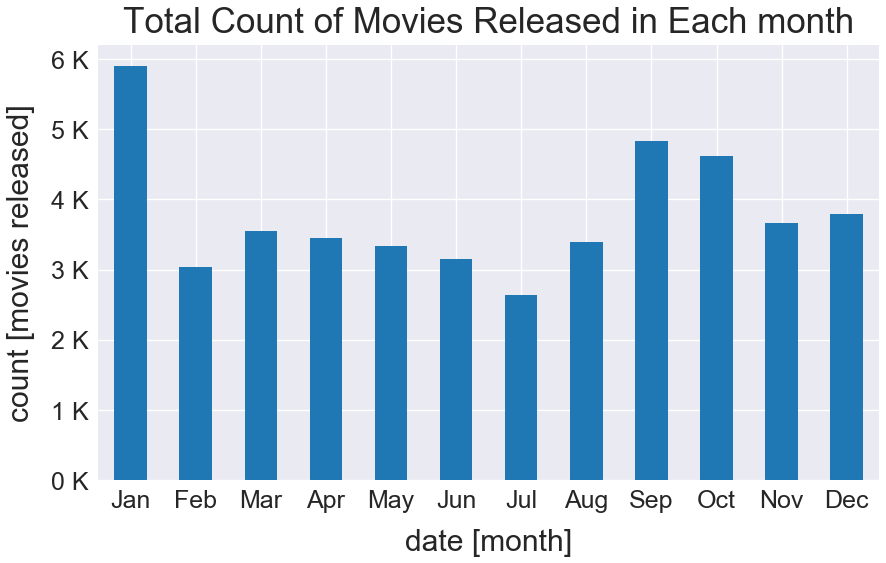

In [146]:
ax = df_movie.pivot_table(values='release_date', index='release_month', aggfunc='count').reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']).plot(kind='bar', figsize=(14, 8), rot=0)
plt.xlabel("date [month]", labelpad=16, fontsize = 30);
plt.ylabel("count [movies released]", labelpad=16, fontsize = 30);
plt.title("Total Count of Movies Released in Each month", y=1.015, fontsize=35);
ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_K))
ax.set_xticklabels(monthlab)
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()

January, February, August, and September are known as dump months. Many movies are released during this time but they are the movies with low advertisement and critical expectations. This explains why there are many movies released in January and September in this graph. 

The data set has many missing values for profit so in the next graph I removed all rows that do not have a corresponding profit value 

## Count of Movies Released in Each Month That Also  have profit data 

In [84]:
df_nonull_prof = df_movie[df_movie['profit'].notnull()]

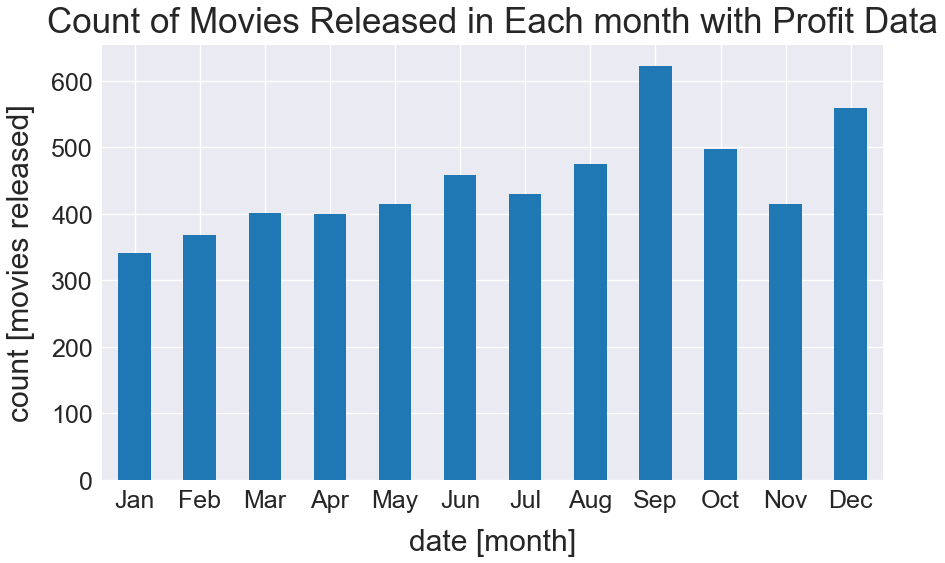

In [148]:
ax = df_nonull_prof.pivot_table(values='release_date', index='release_month', aggfunc='count').reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']).plot(kind='bar', figsize=(14, 8), rot=0)
plt.xlabel("date [month]", labelpad=16, fontsize = 30)
plt.ylabel("count [movies released]", labelpad=16, fontsize = 30)
plt.title("Count of Movies Released in Each month with Profit Data", y=1.015, fontsize=35)
ax.set_xticklabels(monthlab)
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()

You can still see that September and August have a high amount of movies released. January has less but this is because many movies released in January did not have profit data and I droped the rows that did not have profit data

In [86]:
df_movie_dates = df_movie[['profit', 'release_month', 'release_weekday']]

In [87]:
df_movie_dates_pivot = pd.pivot_table(df_movie[[ 'release_weekday', 'release_month', 'profit']], index = ['release_weekday', 'release_month'], aggfunc = 'count')

In [88]:
df_movie_dates_pivot2 = df_movie_dates_pivot .unstack(level=0)

In [89]:
df_movie_dates_pivot2 = df_movie_dates_pivot2.reindex_axis(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], axis=1, level=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


## Average Profit Generated From Movies Released in Each Month

In [90]:
def y_fmt(tick_val, pos):
    if tick_val >=1000000 and tick_val <1000000000:
        val = int(tick_val)/1000000
        return '${:.0f} M'.format(val)
    elif tick_val >= 1000000000:
        val = int(tick_val) / 1000000000
        return '${:.1f} B'.format(val)
    else:
        return tick_val

In [91]:
df_movie['release_month'] = (df_movie['release_month'].astype(str))

In [92]:
profit1 = []
month1 = []
for j in range(0,len(df_movie),1):
    month1.append(df_movie['release_month'][j])
    profit1.append(df_movie['profit'][j])       

In [93]:
df_month_prof = pd.DataFrame({ 'Profit': profit1, 'Month': month1})

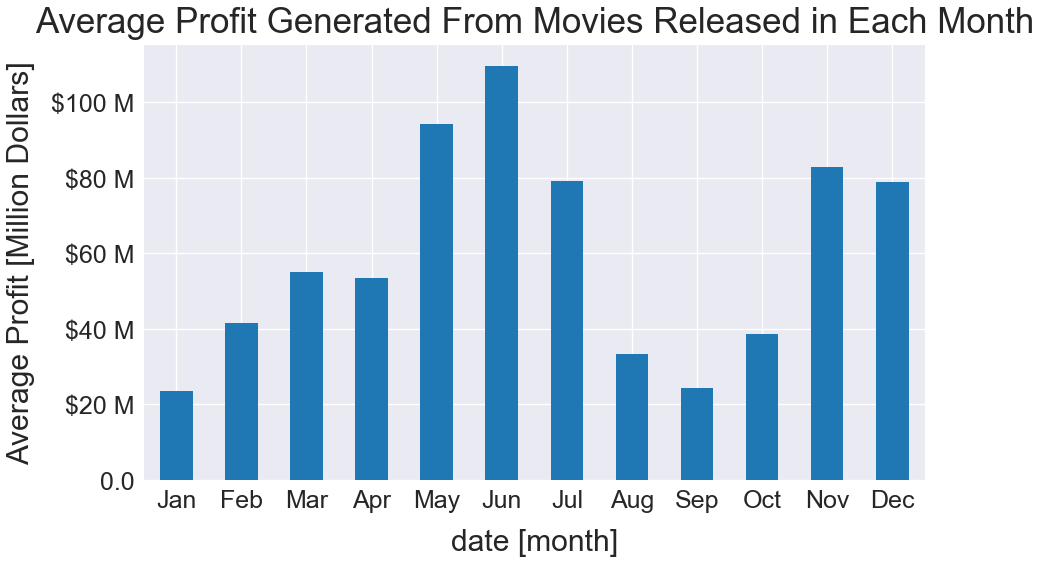

In [149]:
ax = df_month_prof.pivot_table(values='Profit', index='Month', aggfunc='mean').reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']).plot(kind='bar', figsize=(14, 8), rot=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt))
plt.xlabel("date [month]", labelpad=16, fontsize = 30)
plt.ylabel("Average Profit [Million Dollars]", labelpad=16, fontsize = 30)
ax.set_xticklabels(monthlab)
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()
plt.title("Average Profit Generated From Movies Released in Each Month", y=1.015, fontsize=35);

When we compare the previous bar graph with amount of movies released in each month, to average profit generated in each month we see that even though January has the most amount of movies released, it has the least amount of profit. June has the highest amount of profit even though majority of the movies were not released in June. This finding is consistent with the dump month explanation. The movies with low expectations were released in the months of Jan, Feb, Aug, and Sept, and we can see that these months have a low profit in this graph. 

## Genres of Movies Produced 

In [95]:
x = []
genres =[]
for i in (df_movie['genres']):
    x.append( ast.literal_eval(i))

In [96]:
genres = []
movieyear = []
for j in range(0,len(x),1):
    for i in range(0,(len(x[j])),1):
        genres.append(x[j][i]['name'])
        movieyear.append(df_movie['release_year'][j])

In [97]:
df_genres = pd.DataFrame({ 'Genre': genres, 'Year': movieyear})

### How many different genres are there in this dataset?

In [98]:
df_genres.Genre.nunique()

32

There are 32 different genres of movies produced

### Top 10 Genres of Movies Produced

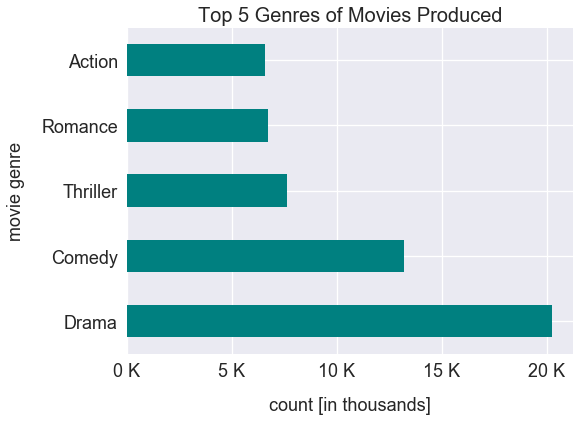

In [99]:
plt.figure(figsize=(8, 6))
ax = pd.value_counts(df_genres['Genre']).head(5).plot.barh(color = 'teal');
plt.xlabel("count [in thousands]", labelpad=16, fontsize = 18)
plt.ylabel("movie genre", labelpad=16, fontsize = 18);
plt.title('Top 5 Genres of Movies Produced', fontsize = 20);
ax.xaxis.set_major_formatter(plt.FuncFormatter(convert_K))
ax.tick_params(axis='both', labelsize=18)

This graph shows which genres are most produced. Drama has the most amount of films

In [101]:
genres = []
movieprof = []
for j in range(0,len(x),1):
    for i in range(0,(len(x[j])),1):
        genres.append(x[j][i]['name'])
        movieprof.append(df_movie['profit'][j])

In [102]:
df_genres_prof = pd.DataFrame({ 'Genre': genres, 'Profit': movieprof })
avg_prof_genre = df_genres_prof.groupby(['Genre']).mean()
avg_prof_genre= avg_prof_genre.dropna()

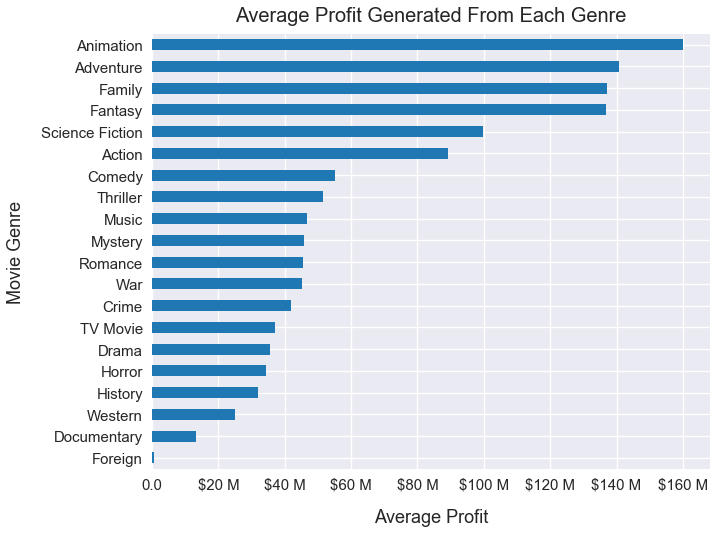

In [103]:
ax = df_genres_prof.pivot_table(values='Profit', index='Genre', aggfunc='mean').sort_values(by = 'Profit', ascending = True).plot(kind='barh', figsize=(10, 8), rot=0);
ax.xaxis.set_major_formatter(plt.FuncFormatter(y_fmt));
plt.ylabel("Movie Genre", labelpad=16, fontsize = 18);
plt.xlabel("Average Profit", labelpad=16, fontsize = 18);
plt.title("Average Profit Generated From Each Genre", y=1.015, fontsize=20);
ax.legend_.remove()
ax.tick_params(axis='both', labelsize=15)

We saw earlier in the top 10 genre count plot that the most movie genres released were drama, comedy, thriller, romance, action, horror, crime, documentary, adventure, and science fiction. However, this graph shows that not all those genres were the most profitable. Animation, Adventure, and Family had the highest average profit even though those were not on the top 10 list of genres produced. Drama has one of the least amounts of average profit even though most movies produced each year were drama.   

In [104]:
df_genres_sub = df_genres[df_genres['Year'] > 1990]
df_genres_sub = df_genres_sub[df_genres_sub['Year'] <2014]

In [105]:
df_series =(df_genres_sub.groupby(['Genre', 'Year']).size())

In [106]:
df_series = df_series.unstack(level=0)
df_series['sum'] = df_series.sum(axis = 1)

In [107]:
df_top_10 = df_series.loc[:, ['Drama', 'Comedy', 'Thriller','Romance', 'Action', 'Horror', 'Crime', 'Documentary', 'Adventure', 'Science Fiction']]

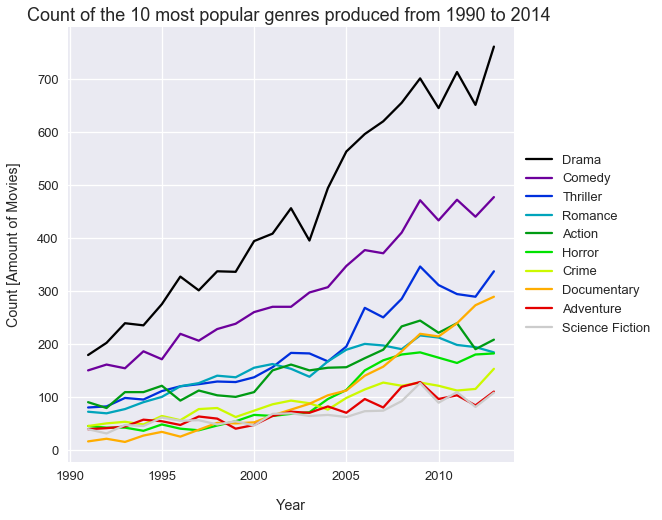

In [108]:
ax = df_top_10.plot(kind='line', subplots=False,figsize=(8,8), colormap='nipy_spectral');
plt.title('Count of the 10 most popular genres produced from 1990 to 2014 ', fontsize = 18);
plt.xlabel('Year', labelpad = 16);
plt.ylabel('Count [Amount of Movies]', labelpad = 16);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The count of the movies produced in each genre is increasing over time but this could be only because the amount of movies released increased in each subsequent year. In the next graph I will find the average percentage of movies that were produced in each genre in each year. This way it will be easier to look at an increase or decrease in movies produced over time

In [109]:
df_averages = df_series.loc[:,:].div(df_series["sum"], axis=0)*100
df_averages = df_averages.drop(['sum'], axis=1)

In [110]:
df_genre_top_averages = df_averages.loc[:, ['Drama','Romance', 'Action', 'Horror', 'Documentary']]

In [111]:
def y_fmt_perc(tick_val, pos):
        return '{:.0f}%'.format(tick_val)

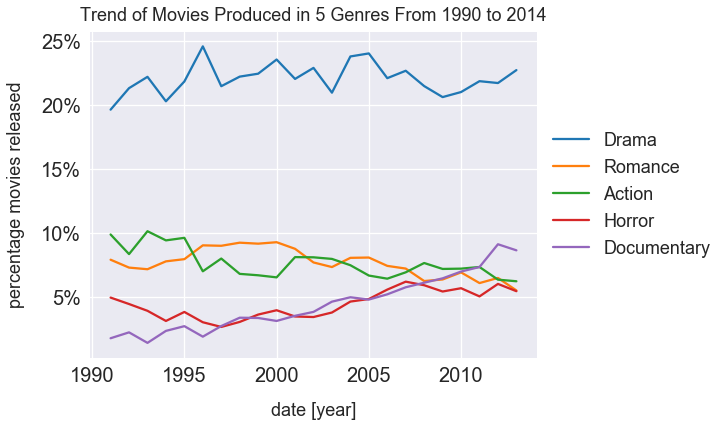

In [112]:
ax = df_genre_top_averages.plot(kind='line', subplots=False,figsize=(8,6));
plt.title('Trend of Movies Produced in 5 Genres From 1990 to 2014', fontsize = 18, y =1.015);
plt.xlabel('date [year]', labelpad = 16, fontsize = 18);
plt.ylabel('percentage movies released', labelpad = 16, fontsize = 18);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 18);
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt_perc))
ax.tick_params(axis='both', labelsize=20)

Drama movies are the most produced movies because they are the cheapest to produce.

Documentaries have become more popular for several reasons. New technology offers greater investigative potentials. Documentary makers are picking more engaging subjects. They have become better at their art and capture cinematic moments, using storytelling techniques in a raw and believable manner. 

Action and romance movies have decreased and horror movies have increased.

In [113]:
df_genre_action = df_averages.loc[:, ['Action']]

## A Closer Look at The Amount of Movies Released: Percentage change in 3 Genres 

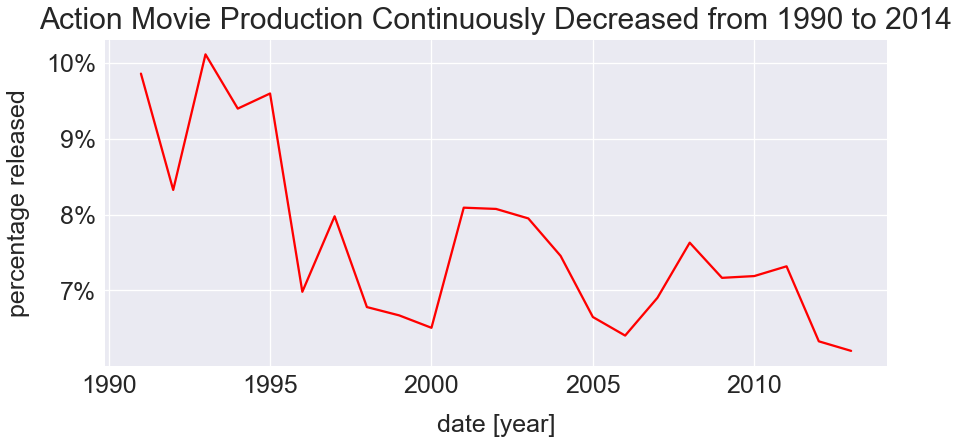

In [158]:
ax = df_genre_action.plot(kind='line', subplots=False,figsize=(14,6), color = 'red');
plt.title('Action Movie Production Continuously Decreased from 1990 to 2014', fontsize = 30, y =1.015);
plt.xlabel('date [year]', labelpad = 16, fontsize = 25);
plt.ylabel('percentage released', labelpad = 16, fontsize = 25);
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt_perc))
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()

Action movies decreased overall by about 3%. Filmmakers risk irritating audiences if they include too much motion so that may cause action movies to be less popular. Action movies with a lot of technology is also more expensive to produce and can also contribute to the decrease in acion movies produced.  

In [115]:
df_genre_drama = df_averages.loc[:, ['Drama']]

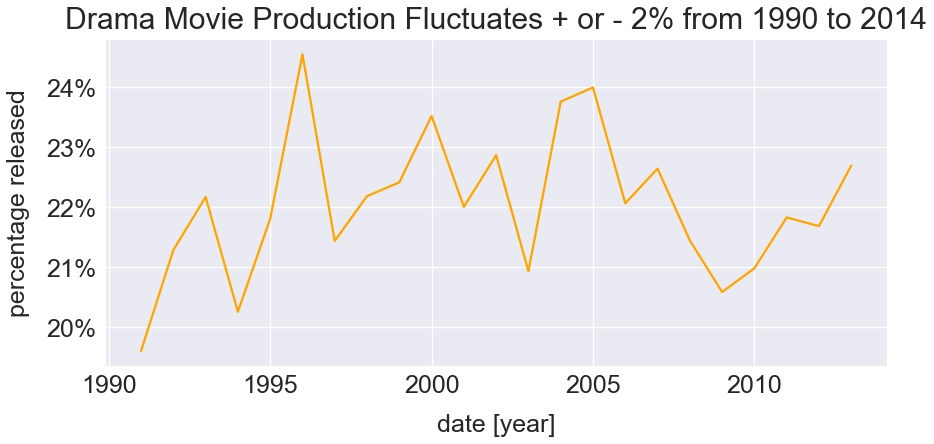

In [154]:
ax = df_genre_drama.plot(kind='line', subplots=False,figsize=(14,6), color = 'orange');
plt.title('Drama Movie Production Fluctuates + or - 2% from 1990 to 2014', fontsize = 30, y =1.015);
plt.xlabel('date [year]', labelpad = 16, fontsize = 25);
plt.ylabel('percentage released', labelpad = 16, fontsize = 25);
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt_perc))
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()

Drama movie production stayed relatively constant and fluctuated around +/- 2% from 22%.  Dramas are the cheapest to make. Drama is a broad genre with many subgenres. There are many romance and horror films that fall in the category of drama too

In [117]:
df_genre_documentary = df_averages.loc[:, ['Documentary']]

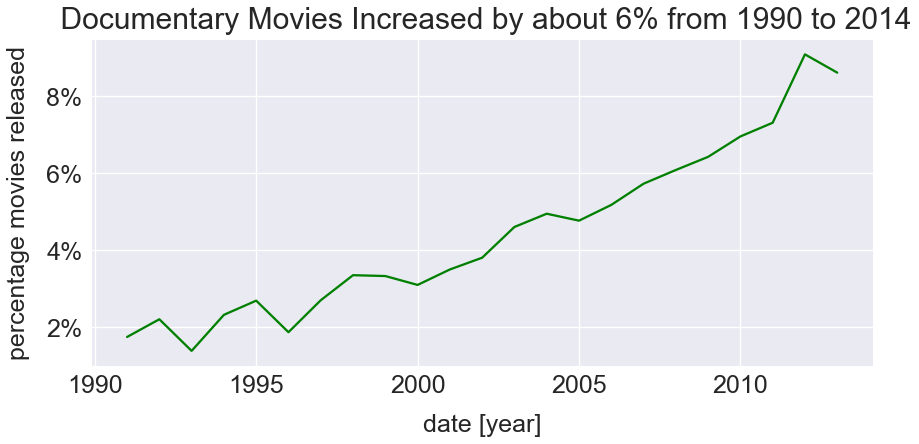

In [156]:
ax = df_genre_documentary.plot(kind='line', subplots=False,figsize=(14,6), color = 'green');
plt.title(' Documentary Movies Increased by about 6% from 1990 to 2014', fontsize = 30, y =1.015);
plt.xlabel('date [year]', labelpad = 16, fontsize = 25);
plt.ylabel('percentage movies released', labelpad = 16, fontsize = 25);
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt_perc))
ax.tick_params(axis='both', labelsize=25)
ax.legend_.remove()

Documentaries constantly increase. Documentary production increased by about 6% from 1990 to 2010. Theres a rising interest in real life events. Documentaries are not as boring as before where movie makers would just explain an even and the increase in technology and better story telling has also made documentaries more popular. Starting the 2000s, Netflix has funded many movies. Private corporations are also writing documentaries that improve their public image. The Netflix recommendation engine alss suggests documentaries from companies that endorse them. 


In [119]:
df_credits = pd.read_csv('/Users/saronakenny/Documents/SCUSummerQuarter2018/Data Viz/Individual Project/credits.csv')

In [120]:
df_credits['id'] = pd.to_numeric(df_credits['id'], errors='coerce')
df_movie['id'] = pd.to_numeric(df_movie['id'], errors='coerce')

In [121]:
df_credits['id'] = df_credits['id'].replace(0,np.nan)

In [122]:
df_credits_movie = pd.merge(df_credits, df_movie, on = 'id', how = 'left')

In [123]:
df_credits_movie['budget'] = pd.to_numeric(df_credits_movie['budget'], errors='coerce')
df_credits_movie['revenue'] = pd.to_numeric(df_credits_movie['revenue'], errors='coerce')
df_credits_movie['vote_count'] = pd.to_numeric(df_credits_movie['vote_count'], errors='coerce')

In [124]:
df_credits_movie['budget'] = df_credits_movie['budget'].replace(0,np.nan)
df_credits_movie['revenue'] = df_credits_movie['revenue'].replace(0,np.nan)
df_credits_movie['vote_count'] = df_credits_movie['vote_count'].replace(0,np.nan)

In [125]:
y = []
cast =[]

for i in (df_credits_movie['cast']):
    y.append( ast.literal_eval(i))

In [126]:
title = []
profit = []
gender = []

for j in range(0,len(y),1):
    for i in range(0,(len(y[j])),1):
        gender.append(y[j][i]['gender'])
        title.append(df_credits_movie['title'][j])
        profit.append(df_credits_movie['profit'][j])   

In [127]:
df_actor_gender = pd.DataFrame({ 'Title':title, 'gender':gender, 'Profit':profit })

In [128]:
df_actor_gender = df_actor_gender[df_actor_gender.gender != 0]

In [129]:
gen= {1: 'Female', 2: 'Male'}

In [130]:
df_actor_gender['gender'] = df_actor_gender['gender'].map(gen)

In [131]:
df_actor_gender['gender'] = df_actor_gender['gender'].astype(str)
df_actor_gender['Title'] = df_actor_gender['Title'].astype(str)

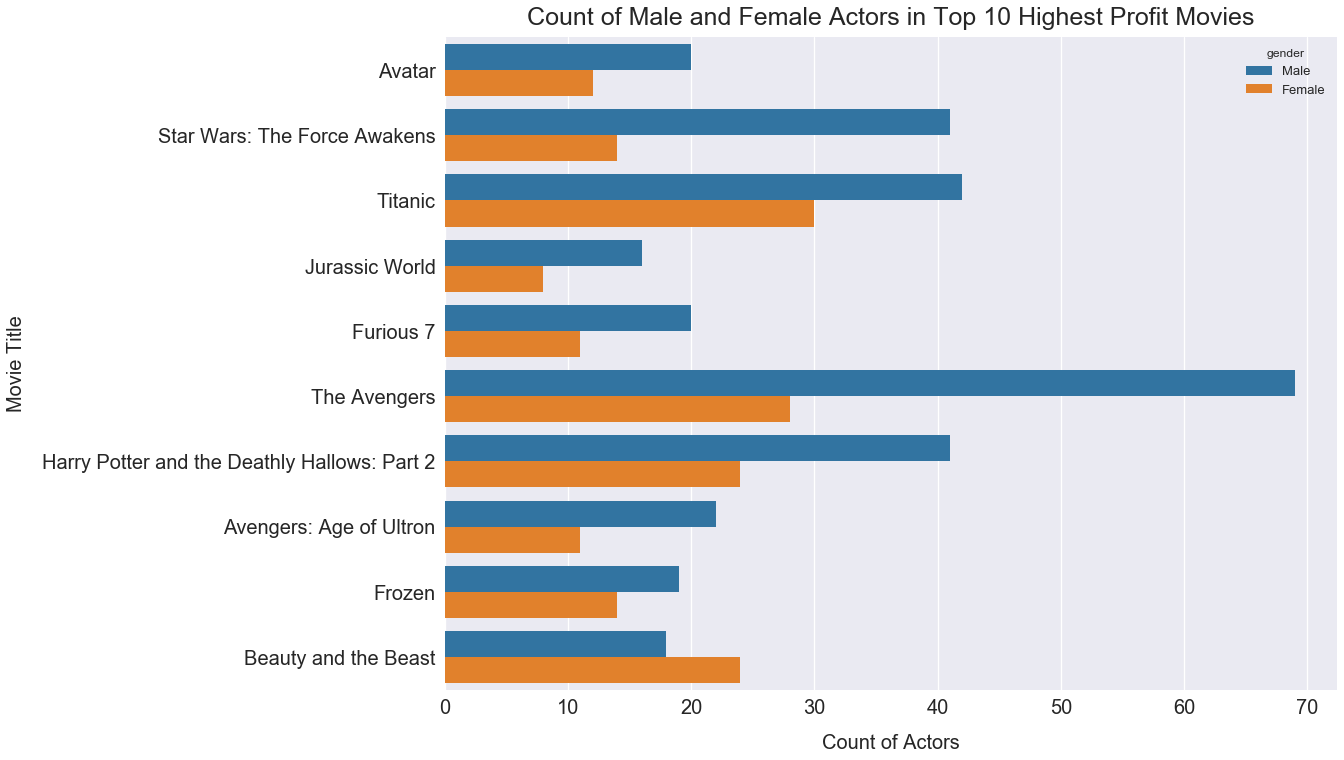

In [132]:
plt.figure(figsize=(16, 12))
ax = sns.countplot(y="Title", hue="gender", data=df_actor_gender.sort_values(by = 'Profit', ascending = False).head(484))
ax.axes.set_title("Count of Male and Female Actors in Top 10 Highest Profit Movies", fontsize=25, y=1.01)
ax.axes.set_xlabel('Count of Actors',labelpad = 16, fontsize = 20)
ax.axes.set_ylabel('Movie Title', labelpad = 16, fontsize = 20);
ax.tick_params(axis='both', labelsize=20)

Most movies have more males than females as actors. Beauty and the Beast is an exception and there are more females than males. 